<a href="https://colab.research.google.com/github/rajat10-01/machine-learning/blob/master/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import required libraries
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

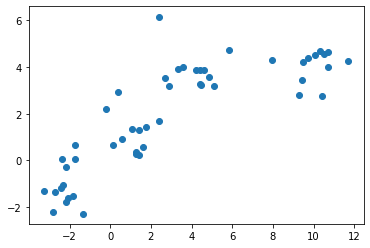

In [3]:
# generating random data for testing the algorithm
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [4]:
# creating the model and fitting the data
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

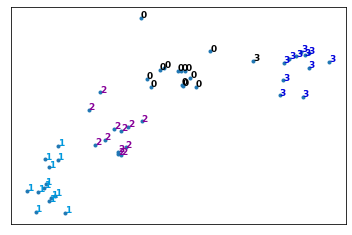

In [5]:
# plot the model fit on a graph
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))
# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)
# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
 
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [6]:
# Dendrogram Associated for the Agglomerative Hierarchical Clustering
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.7905938  0.79378186 ... 0.80122495 0.52824658 0.40758611]
 [0.7905938  0.         0.07726654 ... 0.08819808 0.3101903  0.43619573]
 [0.79378186 0.07726654 0.         ... 0.01248739 0.35013785 0.46746667]
 ...
 [0.80122495 0.08819808 0.01248739 ... 0.         0.36172937 0.47825237]
 [0.52824658 0.3101903  0.35013785 ... 0.36172937 0.         0.13155208]
 [0.40758611 0.43619573 0.46746667 ... 0.47825237 0.13155208 0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


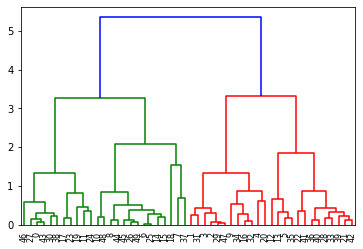

In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


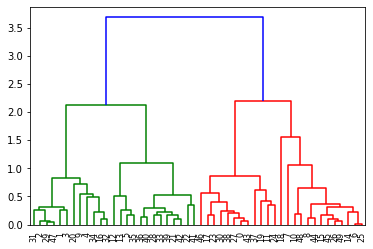

In [9]:
# changing the linkage to average linkage
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)